In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
filename = 'crab.txt'
raw_data = open(filename, 'rt')
data = np.loadtxt(raw_data, delimiter="\t",skiprows=1)
print(data.shape)

(200, 8)


In [3]:
# data with labels
#print("Data :")
#print(data)

#labels
labels=data[:,0:1]
print("Labels : ",labels.shape)
training_labels=labels[:140]
test_labels=labels[140:]
train_labels=labels[:140]

#data excluding the first column since the first column represents the labels
#print("Data excluding first column and the last column :")
#print( data[:,1:-1])
TestX= data[:,1:-1][140:]
TrainingX= data[:,1:-1][:140]
print("Test Set, ",TestX.shape)
print("Training Set, ",TrainingX.shape)

Labels :  (200, 1)
Test Set,  (60, 6)
Training Set,  (140, 6)


In [4]:
#This part is for analysing the data, to see how many of the samples belong to Class 1, and how many of them belongs to Class2. 

Dict={}
for each in labels:
    if(each[0] in Dict): # if it exists then increment by one
        Dict[each[0]] +=1
    else: #if it does not exist then initialize the count by 1 , add to the dictionary
        Dict[each[0]]=1
# This basically shows how many classes are there in our data. Here we can see that there are 2 classes.
print (len(Dict))
# The number of samples that belong to the class 0
print (Dict[0]) 
# The number of samples that belong to the class 1
print (Dict[1])

# If you look at each element in labels[:140] rather than labels,
# then you will see the number of samples per each class within the training data set. 
# And this number will actually give the P(C0) and P(C1), which are the probability of class 1 and probability of class 2.

2
100
100


In my code I assumed that sample belongs to Class 1 if its label = 1. .
And it belongs to Class 2 if its label=0..

In [5]:
Class1X=[]
Class2X=[]
for each in  data[:,:-1][:140]: #data excluding the last column, in order to prevent the singular matrix problem in the feature
    if(int(each[0])==1):
        Class1X.append(each[1:])
    else:
        Class2X.append(each[1:])
print ("Class 1 Data")
Class1X=np.asarray(Class1X)
print(Class1X.shape)
print ("Class 2 Data")
Class2X=np.asarray(Class2X)
print(Class2X.shape)

Class 1 Data
(68, 6)
Class 2 Data
(72, 6)


In [6]:
testClass1X=[]
testClass2X=[]
for each in data[:,:-1][140:]:#data excluding the last column, in order to prevent the singular matrix problem in the feature
    if(int(each[0])==1):
        testClass1X.append(each[1:])
    else:
        testClass2X.append(each[1:])
print ("Test Class 1 Data") 
testClass1X=np.asarray(testClass1X)
print(testClass1X.shape)
print ("Test Class 2 Data")
testClass2X=np.asarray(testClass2X)
print(testClass2X.shape)

Test Class 1 Data
(32, 6)
Test Class 2 Data
(28, 6)


In [7]:
#Since we have 7 features the mean of each class will be of size dx1=7x1
mu1 = np.mean(Class1X, axis=0)
print('Mean of Class 1: ', mu1)
#Since we have 7 features the mean of each class will be of size dxd=7x7
cov1 = np.cov(Class1X.T)
print('Covariance of Class 1: ',cov1)
#print("Shape of Covariance", cov1.shape)

mu2 = np.mean(Class2X, axis=0)
print('Mean of Class 2: ',mu2)

cov2 = np.cov(Class2X.T)
print('Covariance of Class 2: ',cov2)

# Estimate the prior for each class
pC1 = Class1X.shape[0]/(Class1X.shape[0] + Class2X.shape[0])
print('Probability of  Class 1: ',pC1)

pC2 = Class2X.shape[0]/(Class1X.shape[0] + Class2X.shape[0])
print('Probability of Class 2: ',pC2)

Mean of Class 1:  [14.03529412 11.84705882 30.08676471 34.73382353 12.56764706  0.51470588]
Covariance of Class 1:  [[ 9.21903424  5.97159789 21.19107112 24.21281826  9.46712906  0.56365233]
 [ 5.97159789  4.57118525 13.72510975 15.78868306  6.24841089  0.06944688]
 [21.19107112 13.72510975 49.21638938 56.12493196 21.88956541  1.40094381]
 [24.21281826 15.78868306 56.12493196 64.1691374  25.01991659  1.52561457]
 [ 9.46712906  6.24841089 21.88956541 25.01991659  9.89117647  0.55122915]
 [ 0.56365233  0.06944688  1.40094381  1.52561457  0.55122915  0.25351185]]
Mean of Class 2:  [17.10555556 13.62083333 34.1375     38.10277778 15.46527778  0.51388889]
Covariance of Class 2:  [[ 9.29827856  7.23185446 18.83640845 21.15223787  8.68850548 -0.43106416]
 [ 7.23185446  6.85913732 14.3518838  16.57768779  6.55777582 -0.79254695]
 [18.83640845 14.3518838  38.99167254 43.51876761 18.02005282 -0.63644366]
 [21.15223787 16.57768779 43.51876761 48.98168232 20.07671753 -0.92539124]
 [ 8.68850548  6.

In [8]:
y1 = multivariate_normal.pdf(TestX,mean=mu1, cov=cov1)
y2 = multivariate_normal.pdf(TestX,mean=mu2, cov=cov2)

*(5 points)* Did you encounter any problems when implementing the probabilistic generative model? What is your solution for the problem? Explain why your solution works. (Note: There are more than one solution.)

Here when we calculate the multivariate normal distribution by using the mean and the covariance of the each class, actually the covariance matrix happened to be singular matrix. So first, I added the "allow_singular=True" parameter. However, then I recalled that the singularity happens if there is a feature which is highly correlated with another feature. And looking at the features, one can see that Female and Male features are reversely correlated. So I omitted the last feature (Female), and rerun the experiment and the singularity problem is solved.

In [9]:
# Look at the posterior distributions
pos1 = (y1*pC1)/(y1*pC1 + y2*pC2)
pos2 = (y2*pC2)/(y1*pC1 + y2*pC2)

In [10]:
#print (len(pos1))
#print (pos1)

In [11]:
#print (len(pos2))
#print(pos2)

In [12]:
#Decision Boundary Check
predicted_test_labels=[]
for i in range(0,len(pos1)):
    if(pos1[i]>pos2[i]):
        predicted_test_labels.append([1.])
    else:
        predicted_test_labels.append([0.])
#print(np.asarray(predicted_test_labels))
#print(test_labels)

#How many of the decisions are correct.
correct_class1=0 #true positive
correct_class2=0  #true negative
incorrect_class1=0 #false positive
incorrect_class2=0  #false negative
for i in range(0,len(predicted_test_labels)):
    if(int(predicted_test_labels[i][0])== int(test_labels[i][0])):
        if(int(test_labels[i][0])==1):
            correct_class1=correct_class1+1
        else:
            correct_class2=correct_class2+1
    else:
        if(int(predicted_test_labels[i][0])==1):
            incorrect_class1=incorrect_class1+1
        else:
            incorrect_class2=incorrect_class2+1

#print(correct_class1) #true positive
#print(correct_class2) #true negative
#print(incorrect_class1) #false positive
#print(incorrect_class2) #false negative

confusion_matrix_test=[]
TP=correct_class1
TN=correct_class2
FP=incorrect_class1
FN=incorrect_class2

confusion_matrix_test.append([TP,FP])
confusion_matrix_test.append([FN,TN])

print(np.array(confusion_matrix_test))



[[32  0]
 [ 0 28]]


The same steps are repeated with the Training samples, and the confusion matrix is shown at the end.

In [13]:
y1_train = multivariate_normal.pdf(TrainingX,mean=mu1, cov=cov1)
y2_train = multivariate_normal.pdf(TrainingX,mean=mu2, cov=cov2)

In [14]:
# Look at the posterior distributions with Training Set
pos1_train = (y1_train*pC1)/(y1_train*pC1 + y2_train*pC2)
pos2_train = (y2_train*pC2)/(y1_train*pC1 + y2_train*pC2)

#print(len(pos1_train))
#print(len(pos2_train))

In [15]:
#Decision Boundary Check
predicted_train_labels=[]
for i in range(0,len(pos1_train)):
    if(pos1_train[i]>pos2_train[i]):
        predicted_train_labels.append([1.])
    else:
        predicted_train_labels.append([0.])
#print(np.asarray(predicted_test_labels))
#print(test_labels)


#How many of the decisions are correct.
correct_class1=0 #true positive
correct_class2=0  #true negative
incorrect_class1=0 #false positive
incorrect_class2=0  #false negative
for i in range(0,len(predicted_train_labels)):
    if(int(predicted_train_labels[i][0])== int(train_labels[i][0])):
        if(int(train_labels[i][0])==1):
            correct_class1=correct_class1+1
        else:
            correct_class2=correct_class2+1
    else:
        if(int(predicted_train_labels[i][0])==1):
            incorrect_class1=incorrect_class1+1
        else:
            incorrect_class2=incorrect_class2+1

#print(correct_class1) #true positive
#print(correct_class2) #true negative
#print(incorrect_class1) #false positive
#print(incorrect_class2) #false negative

confusion_matrix_train=[]
TP=correct_class1
TN=correct_class2
FP=incorrect_class1
FN=incorrect_class2

confusion_matrix_train.append([TP,FP])
confusion_matrix_train.append([FN,TN])

print(np.array(confusion_matrix_train))

[[68  0]
 [ 0 72]]


(5 points) Report your classification results in terms of a confusion matrix in both training and test set.

In [16]:
print("Confusion Matrix in Test Set")
print(np.array(confusion_matrix_test))
print("Confusion Matrix in Training Set")
print(np.array(confusion_matrix_train))

Confusion Matrix in Test Set
[[32  0]
 [ 0 28]]
Confusion Matrix in Training Set
[[68  0]
 [ 0 72]]


# K-NEAREST NEIGHBORS

In [17]:
from scipy.spatial.distance import pdist, squareform
import operator
pairwise_distance_matrix = squareform(pdist(data[:,1:-1], 'euclidean')) #I used the square form because I feel more comfortable understanding.

If we select the last 60 to be the test and the first 140 to be the training, then we need to check the pairwise distance of last 60 with first 140. Hence it is more reasonable to start with a matrix which has all the pairwise distances available. Since we will need to do cross validation later on to find the best k value, it is more reasonable to have the entire data vs entire data distance calculation.
I also did cross validation on different distance metrices. And found out that the cosine angle distance metric works the best.

In [18]:
print(pairwise_distance_matrix.shape)

(200, 200)


# 2.4  Implement the -Nearest Neighbor (-NN) classifier on the crab data set.

In [19]:
#decide is a function to decide which class is the winner class given the key , Dictionary and k. 
#key is the test sample index
#Dict is a data structure, Dictionary which has test sample index as a key, and a sorted list of pair wise distances to all the training samples, as the value
#If returns 1. then the key sample is found to belong to Class1
#If returns 0. then the key sample ıs found to belong to Class2 
def decide(key,Dict,k):
    winner1=0
    winner2=0
    best_k=Dict[key][:k]
    for each in best_k:
        if(int(labels[each[0]])==1):
            #increase the winner 1 count
            winner1=winner1+1
        else:
            #increase the winner 2 count
            winner2=winner2+1
    if(winner1>winner2):
        return 1.
    else:
        return 0.
    
def KNN(pairwise_distance_matrix,k):
        Dict={} # define a dictionary, for every data keep the sorted list of [index, distance] . The list is sorted wrt to the distance.
        for i in range(140,200): #for every test data
            a_list=[]
            for j in range(0,140): #for every training
                a_list.append([j,pairwise_distance_matrix[i][j]]) #pick the respective distance
            a_list= sorted(a_list,key=operator.itemgetter(1)) #sort the list of [index,distance] wrt distance
            Dict[i]= a_list # append the distance sorted list to the key= test_sample 

        predicted_test_labels=[]
        for each in Dict.keys(): #for every test data 
            #call the decide function with the Dictionary and the k value
            # and append the decision for that particular data to the predicted test labels list.
            predicted_test_labels.append([decide(each,Dict,k)]) 



        #How many of the decisions are correct.
        correct_class1=0 #true positive
        correct_class2=0  #true negative
        incorrect_class1=0 #false positive
        incorrect_class2=0  #false negative
        for i in range(0,len(predicted_test_labels)):
            if(int(predicted_test_labels[i][0])== int(test_labels[i][0])):
                if(int(test_labels[i][0])==1):
                    correct_class1=correct_class1+1
                else:
                    correct_class2=correct_class2+1
            else:
                if(int(predicted_test_labels[i][0])==1):
                    incorrect_class1=incorrect_class1+1
                else:
                    incorrect_class2=incorrect_class2+1

        #print(correct_class1) #true positive
        #print(correct_class2) #true negative
        #print(incorrect_class1) #false positive
        #print(incorrect_class2) #false negative

        confusion_matrix_test=[]
        TP=correct_class1
        TN=correct_class2
        FP=incorrect_class1
        FN=incorrect_class2
        print("K=",k)
        print("Confusion Matrix for Test : ")
        confusion_matrix_test.append([TP,FP])
        confusion_matrix_test.append([FN,TN])
        print(np.array(confusion_matrix_test))
        print("Accuracy for Test: " ,(TP+TN)/(TP+TN+FP+FN))
        print("\n")
        
        return (TP+TN)/(TP+TN+FP+FN)
    
def KNN_Training(pairwise_distance_matrix,k):
        Dict={} # define a dictionary, for every data keep the sorted list of [index, distance] . The list is sorted wrt to the distance.
        for i in range(0,140): #for every test data
            a_list=[]
            for j in range(0,140): #for every test
                a_list.append([j,pairwise_distance_matrix[i][j]]) #pick the respective distance
            a_list= sorted(a_list,key=operator.itemgetter(1)) #sort the list of [index,distance] wrt distance
            Dict[i]= a_list # append the distance sorted list to the key= test_sample 



        #Decision Boundary Check
        predicted_train_labels=[]
        for i in range(0,len(pos1_train)):
            if(pos1_train[i]>pos2_train[i]):
                predicted_train_labels.append([1.])
            else:
                predicted_train_labels.append([0.])
        #print(np.asarray(predicted_test_labels))
        #print(test_labels)


        #How many of the decisions are correct.
        correct_class1=0 #true positive
        correct_class2=0  #true negative
        incorrect_class1=0 #false positive
        incorrect_class2=0  #false negative
        for i in range(0,len(predicted_train_labels)):
            if(int(predicted_train_labels[i][0])== int(train_labels[i][0])):
                if(int(train_labels[i][0])==1):
                    correct_class1=correct_class1+1
                else:
                    correct_class2=correct_class2+1
            else:
                if(int(predicted_train_labels[i][0])==1):
                    incorrect_class1=incorrect_class1+1
                else:
                    incorrect_class2=incorrect_class2+1

        #print(correct_class1) #true positive
        #print(correct_class2) #true negative
        #print(incorrect_class1) #false positive
        #print(incorrect_class2) #false negative

        confusion_matrix_train=[]
        TP=correct_class1
        TN=correct_class2
        FP=incorrect_class1
        FN=incorrect_class2

        confusion_matrix_train.append([TP,FP])
        confusion_matrix_train.append([FN,TN])

        
        print("K=",k)
        print("Confusion Matrix for Training : ")
        print(np.array(confusion_matrix_train))
        print("Accuracy for Training: " ,(TP+TN)/(TP+TN+FP+FN))
        print("\n")
        
        return (TP+TN)/(TP+TN+FP+FN)


    


In [20]:
# DEFINE DIFFERENT DISTANCE MATRICES

#CODE1
pairwise_distance_matrix = squareform(pdist(data[:,1:-1], 'euclidean')) 

#CODE2
pairwise_distance_matrix2= squareform(pdist(data[:,1:-1], 'seuclidean', V=None)) 

#CODE3
pairwise_distance_matrix3= squareform(pdist(data[:,1:-1], 'cityblock')) 

#CODE4
pairwise_distance_matrix4= squareform(pdist(data[:,1:-1], 'cosine')) 



# 2.5 What happens as you vary from small to large? Why? (Include a plot that shows the performance (error/accuracy) as you vary for -NN). Test your classifier implementations several times with different parameter settings and using cross-validation.

I got the best results when I picked the k to be 1 and the distance metric to be the cosine angle. 

Above you can find the K-Value vs Accuracy plots for four different distance metrices. In each of them the smallest k value where k=1 has the best accuracy. Depending on the distance metrices picked, as we increase the k-value the accuracy either drops or remains the same. 

With an euclidean distance metric, the accuracy decreases with initial increase of k, and then it flactuates between certain accuracy range.

Whereas with the cosine angle distance metric, as we increase the k-value the accuracy does not get affected.

When the distance metric is picked to be seuclidean, the decrease of the accuracy is more linear, the best accuracy value is get with the smallest k value and decreases as k increases.

When the distance metric is picked to be cityblock, there is more flactuation in the accuracy there is no linear increase or decrease as we increase the k value, however still the best accuracy is observed when the k value is the minimum, is 1.

As we increase the values of K since the data size is not that big, we start to cover a wider range of the data samples, and if the values of two classes are not that far away from each other this causes a decrease in accuracy. But we also observed that the selection of the distance metric also plays an important role. 


# 2.6 Report your classification results using k-NN in terms of a confusion matrix in both training and test set.

# Accuracy and Confusion Matrix Control on Test Set

CODE1:euclidean 
CODE2:seuclidean 
CODE3:cityblock 
CODE4:cosine



************************************************************************************************
****************************RESULTS*************************************************************
************************************************************************************************



CODE: 1
K= 1
Confusion Matrix for Test : 
[[28  1]
 [ 4 27]]
Accuracy for Test:  0.9166666666666666


K= 2
Confusion Matrix for Test : 
[[27  1]
 [ 5 27]]
Accuracy for Test:  0.9


K= 3
Confusion Matrix for Test : 
[[28  6]
 [ 4 22]]
Accuracy for Test:  0.8333333333333334


K= 4
Confusion Matrix for Test : 
[[28  5]
 [ 4 23]]
Accuracy for Test:  0.85


K= 5
Confusion Matrix for Test : 
[[28  5]
 [ 4 23]]
Accuracy for Test:  0.85


K= 6
Confusion Matrix for Test : 
[[26  5]
 [ 6 23]]
Accuracy for Test:  0.8166666666666667


K= 7
Confusion Matrix for Test : 
[[27  5]
 [ 5 23]]
Accuracy for Test:  0.8333333333333334


K= 8
Confusion 

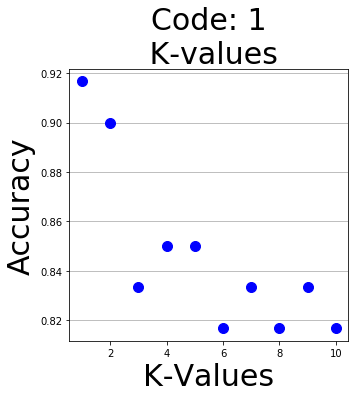


CODE: 2
K= 1
Confusion Matrix for Test : 
[[28  4]
 [ 4 24]]
Accuracy for Test:  0.8666666666666667


K= 2
Confusion Matrix for Test : 
[[25  3]
 [ 7 25]]
Accuracy for Test:  0.8333333333333334


K= 3
Confusion Matrix for Test : 
[[28  7]
 [ 4 21]]
Accuracy for Test:  0.8166666666666667


K= 4
Confusion Matrix for Test : 
[[23  3]
 [ 9 25]]
Accuracy for Test:  0.8


K= 5
Confusion Matrix for Test : 
[[26  5]
 [ 6 23]]
Accuracy for Test:  0.8166666666666667


K= 6
Confusion Matrix for Test : 
[[25  3]
 [ 7 25]]
Accuracy for Test:  0.8333333333333334


K= 7
Confusion Matrix for Test : 
[[28  9]
 [ 4 19]]
Accuracy for Test:  0.7833333333333333


K= 8
Confusion Matrix for Test : 
[[24  6]
 [ 8 22]]
Accuracy for Test:  0.7666666666666667


K= 9
Confusion Matrix for Test : 
[[25 14]
 [ 7 14]]
Accuracy for Test:  0.65


K= 10
Confusion Matrix for Test : 
[[23  8]
 [ 9 20]]
Accuracy for Test:  0.7166666666666667




Code:  2
[[1, 0.8666666666666667], [2, 0.8333333333333334], [6, 0.83333333333

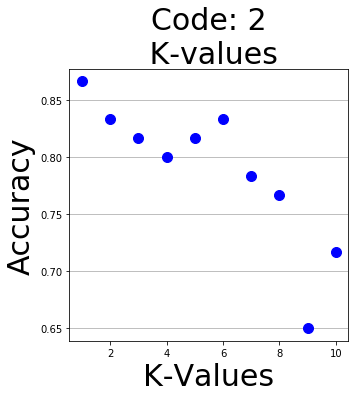


CODE: 3
K= 1
Confusion Matrix for Test : 
[[28  2]
 [ 4 26]]
Accuracy for Test:  0.9


K= 2
Confusion Matrix for Test : 
[[27  2]
 [ 5 26]]
Accuracy for Test:  0.8833333333333333


K= 3
Confusion Matrix for Test : 
[[28  7]
 [ 4 21]]
Accuracy for Test:  0.8166666666666667


K= 4
Confusion Matrix for Test : 
[[27  4]
 [ 5 24]]
Accuracy for Test:  0.85


K= 5
Confusion Matrix for Test : 
[[28  5]
 [ 4 23]]
Accuracy for Test:  0.85


K= 6
Confusion Matrix for Test : 
[[25  5]
 [ 7 23]]
Accuracy for Test:  0.8


K= 7
Confusion Matrix for Test : 
[[28  6]
 [ 4 22]]
Accuracy for Test:  0.8333333333333334


K= 8
Confusion Matrix for Test : 
[[25  5]
 [ 7 23]]
Accuracy for Test:  0.8


K= 9
Confusion Matrix for Test : 
[[29  6]
 [ 3 22]]
Accuracy for Test:  0.85


K= 10
Confusion Matrix for Test : 
[[26  5]
 [ 6 23]]
Accuracy for Test:  0.8166666666666667




Code:  3
[[1, 0.9], [2, 0.8833333333333333], [4, 0.85], [5, 0.85], [9, 0.85], [7, 0.8333333333333334], [3, 0.8166666666666667], [10, 0.

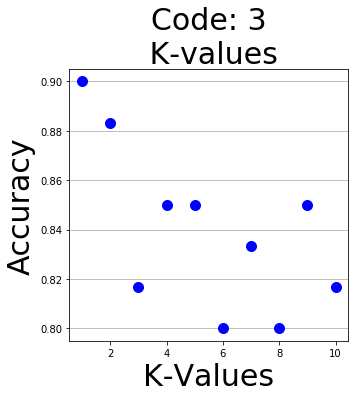


CODE: 4
K= 1
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0


K= 2
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0


K= 3
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0


K= 4
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0


K= 5
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0


K= 6
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0


K= 7
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0


K= 8
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0


K= 9
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0


K= 10
Confusion Matrix for Test : 
[[32  0]
 [ 0 28]]
Accuracy for Test:  1.0




Code:  4
[[1, 1.0], [2, 1.0], [3, 1.0], [4, 1.0], [5, 1.0], [6, 1.0], [7, 1.0], [8, 1.0], [9, 1.0], [10, 1.0]]


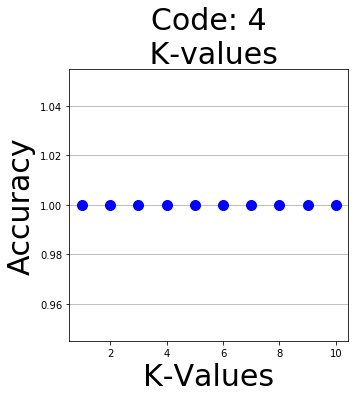




The Best Result is get when the K=1 & Distance Matrix Code= 4


In [21]:
# CROSS VALIDATION FOR PICKING BEST K AND BEST DISTANCE MEASURE


print("CODE1:euclidean \nCODE2:seuclidean \nCODE3:cityblock \nCODE4:cosine")
k_range=[1,2,3,4,5,6,7,8,9,10] # For a range of K values, I will calculate the accuracy and decide which k value performed best.
#Cross Validation in order to decide for K
distance_matrices=[pairwise_distance_matrix,pairwise_distance_matrix2,pairwise_distance_matrix3, pairwise_distance_matrix4]

list_accuracy_distance=[]
#iterate over all distance matrices
code=0 #Code denotes the encoding for different distance matrices.
print("\n\n")
print("************************************************************************************************")
print("****************************RESULTS*************************************************************")
print("************************************************************************************************")
print("\n\n")

for each in distance_matrices :
    code=code+1
    print ("CODE:",code)
    #iterate over all k values defined
    list_accuracy=[]
    for k in k_range:
        accuracy=KNN(each,k)
        list_accuracy.append([k,accuracy])
    list_accuracy= sorted(list_accuracy,key=operator.itemgetter(1),reverse=True)
    print()
    print()
    print("Code: ",code)
    print(list_accuracy)
    x= [x for x, y in list_accuracy]
    y= [y for x, y in list_accuracy]
    plt.figure(figsize=((5,5)))
    plt.plot(x, y,'bo', markersize=10)
    plt.title("Code: "+str(code) +"\n K-values",fontsize = 30)
    plt.xlabel("K-Values", fontsize = 30)
    plt.ylabel("Accuracy", fontsize = 30)
    plt.grid(axis="y")
    plt.show()
    
    #append the best result of K, now we decided for each distance measure which k performs the best. 
    list_accuracy_distance.append([list_accuracy[0],code])
    print()
    
list_accuracy_distance= sorted(list_accuracy_distance,key=operator.itemgetter(1),reverse=True)

print()

print()


#THE BEST RESULT IS GET BY THE FOLLOWING SETTINGS
print("The Best Result is get when the K="+str(list_accuracy_distance[0][0][0])+ " & Distance Matrix Code= "+str(list_accuracy_distance[0][1]))
#print(list_accuracy_distance[0])

       

# Accuracy and Confusion Matrix Control on Training Set

Below you can see that if the training set is used for testing purposes we end up getting accuracy to be 1. 

CODE1:euclidean 
CODE2:seuclidean 
CODE3:cityblock 
CODE4:cosine



************************************************************************************************
****************************RESULTS*************************************************************
************************************************************************************************



CODE: 1
K= 1
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 2
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 3
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 4
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 5
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 6
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 7
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 8
Confusion Matrix

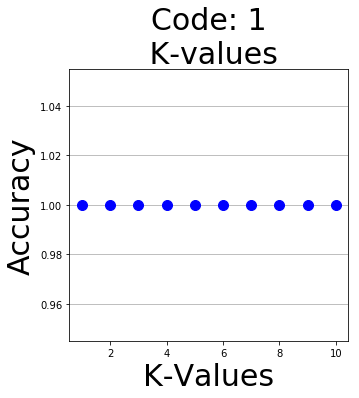


CODE: 2
K= 1
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 2
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 3
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 4
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 5
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 6
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 7
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 8
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 9
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 10
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0




Code:  2
[[1, 1.0], [2, 1.0], [3, 1.0], [4, 1.0], [5, 1.0], [6, 1.0], [7, 1.0], [8, 1.0], [9, 1.0], [10, 1.0]]


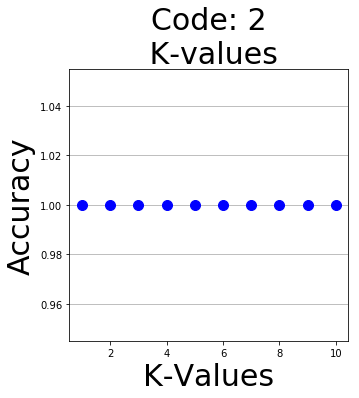


CODE: 3
K= 1
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 2
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 3
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 4
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 5
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 6
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 7
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 8
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 9
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 10
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0




Code:  3
[[1, 1.0], [2, 1.0], [3, 1.0], [4, 1.0], [5, 1.0], [6, 1.0], [7, 1.0], [8, 1.0], [9, 1.0], [10, 1.0]]


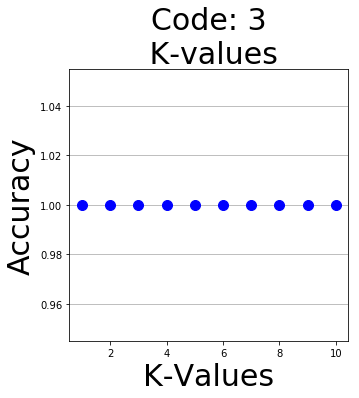


CODE: 4
K= 1
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 2
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 3
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 4
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 5
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 6
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 7
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 8
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 9
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0


K= 10
Confusion Matrix for Training : 
[[68  0]
 [ 0 72]]
Accuracy for Training:  1.0




Code:  4
[[1, 1.0], [2, 1.0], [3, 1.0], [4, 1.0], [5, 1.0], [6, 1.0], [7, 1.0], [8, 1.0], [9, 1.0], [10, 1.0]]


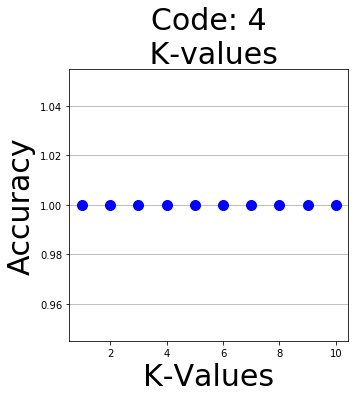




The Best Result is get when the K=1 & Distance Matrix Code= 4


In [22]:
# CROSS VALIDATION FOR PICKING BEST K AND BEST DISTANCE MEASURE


print("CODE1:euclidean \nCODE2:seuclidean \nCODE3:cityblock \nCODE4:cosine")
k_range=[1,2,3,4,5,6,7,8,9,10] # For a range of K values, I will calculate the accuracy and decide which k value performed best.
#Cross Validation in order to decide for K
distance_matrices=[pairwise_distance_matrix,pairwise_distance_matrix2,pairwise_distance_matrix3, pairwise_distance_matrix4]

list_accuracy_distance=[]
#iterate over all distance matrices
code=0 #Code denotes the encoding for different distance matrices.
print("\n\n")
print("************************************************************************************************")
print("****************************RESULTS*************************************************************")
print("************************************************************************************************")
print("\n\n")

for each in distance_matrices :
    code=code+1
    print ("CODE:",code)
    #iterate over all k values defined
    list_accuracy=[]
    for k in k_range:
        accuracy=KNN_Training(each,k)
        list_accuracy.append([k,accuracy])
    list_accuracy= sorted(list_accuracy,key=operator.itemgetter(1),reverse=True)
    print()
    print()
    print("Code: ",code)
    print(list_accuracy)
    x= [x for x, y in list_accuracy]
    y= [y for x, y in list_accuracy]
    plt.figure(figsize=((5,5)))
    plt.plot(x, y,'bo', markersize=10)
    plt.title("Code: "+str(code) +"\n K-values",fontsize = 30)
    plt.xlabel("K-Values", fontsize = 30)
    plt.ylabel("Accuracy", fontsize = 30)
    plt.grid(axis="y")
    plt.show()
    
    #append the best result of K, now we decided for each distance measure which k performs the best. 
    list_accuracy_distance.append([list_accuracy[0],code])
    print()
    
list_accuracy_distance= sorted(list_accuracy_distance,key=operator.itemgetter(1),reverse=True)

print()

print()


#THE BEST RESULT IS GET BY THE FOLLOWING SETTINGS
print("The Best Result is get when the K="+str(list_accuracy_distance[0][0][0])+ " & Distance Matrix Code= "+str(list_accuracy_distance[0][1]))
#print(list_accuracy_distance[0])

       

# 2.7 Determine which classifier you would use for the crab data set and give an explanation of your reasoning

We get accuracy to be 1 in Probability Based Generative Model. And under certain settings we also got accuracy to be 1 with the K-NN classifier. I personally found Probability Based Generative Model easier to implement, however the K-NN classifier provides as a wide range of experiments where it is possible to find the best settings for the data. And since it is not a synthetic data, we do not have information about the distribution of the data. Even if in this case probability based generative model was successful, it might not be as successful, and we cannot get better accuracy by changing some parameters. It is kind of more stable compared to the K-NN method. So I would use the K-NN classifier.